In [22]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import networkx as nx
from helpers import eig
from sklearn.cluster import KMeans

# Exercise 4

(1000, 1)
(784, 1000)


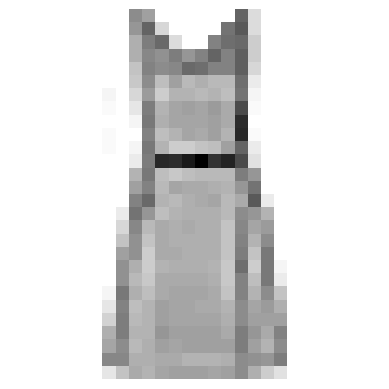

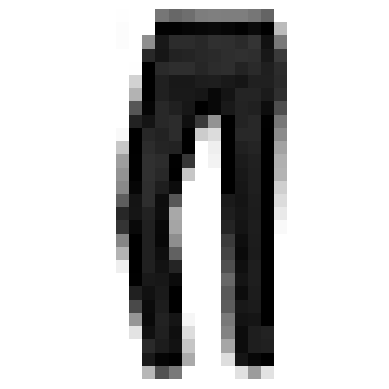

In [23]:
mat = scipy.io.loadmat('hw2_zalando_new.mat')

correct = mat['correct']
items = mat['items']

print(correct.shape)
print(items.shape)


def zalando_plot(z):
    n = 28  # Image size
    A = np.reshape(z, (n, n))

    # Normalize it
    I = np.argmax(np.abs(z))
    za = z[I]
    A = A / za

    B = 1 - A # It looks nicer with a white background.

    # Plot
    plt.imshow(B, cmap='gray', origin='upper')
    plt.axis('off')
    plt.show()

zalando_plot(items[:,0])
zalando_plot(items[:,1])


Clearly pants and dresses are the two items in the dataset

In [24]:
def build_distance(items, w):  #Vectorized way of computing distance
    w = np.array([w]).T
    items = w * items
    S = np.sum(items**2, axis=0, keepdims=True)
    S = np.sqrt(S + S.T - 2 * items.T.dot(items))
    np.fill_diagonal(S, 0)
    return S

# Here is a slower but more intuitive way of computing the distances:
"""
def build_distance(items, w):
    num_points = items.shape[1]
    S = np.zeros((num_points, num_points))
    for i in range(num_points):
        for j in range(i, num_points):
            dist = np.linalg.norm(w * (items[:, i] - items[:, j]))
            S[i, j] = dist
            S[j, i] = dist
    return S
""" 

w = np.ones(items[:,1].shape[0])
S= build_distance(items, w)

/var/folders/m9/hb_z9t0x7tj7c1c__gblxfc00000gn/T/ipykernel_13109/3295717244.py:5: RuntimeWarning: invalid value encountered in sqrt
  S = np.sqrt(S + S.T - 2 * items.T.dot(items))


### B)

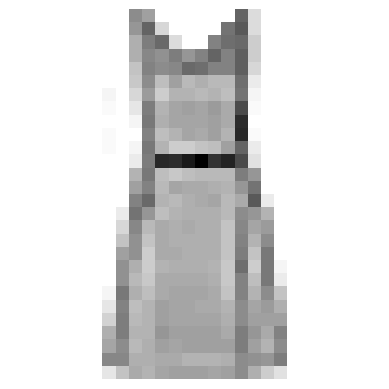

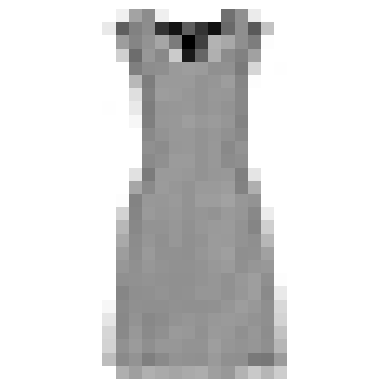

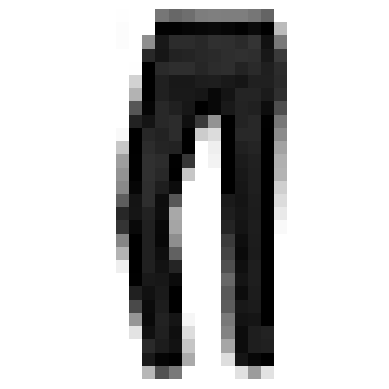

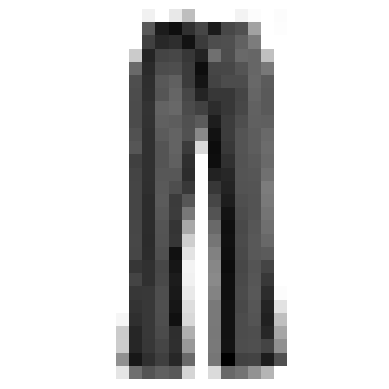

In [48]:
# First item:
zalando_plot(items[:,0])

# Closest to first item:
index = np.argmin(S[0,1:]) + 1
zalando_plot(items[:,index])

# Second item:
zalando_plot(items[:,1])

# Closest to second item
index = np.argmin(S[1,2:]) + 1
zalando_plot(items[:,index])
